In [ ]:
https://www.youtube.com/watch?v=B2q5cRJvqI8

In [1]:
import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [2]:
embedding_layer = layers.Embedding(1000, 5)

In [3]:
result = embedding_layer(tf.constant([1,2,3]))

In [4]:
print(result.numpy())
print(result.numpy().shape)

[[ 0.04555022 -0.04596224 -0.02897309 -0.04339191 -0.03255949]
 [ 0.00169233 -0.04800829 -0.02166637  0.01735402  0.04809069]
 [-0.04665053  0.00367662  0.01423755  0.02364738  0.02132961]]
(3, 5)


In [5]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                         split=(tfds.Split.TRAIN, tfds.Split.TEST),
                                         with_info=True, as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/deepak/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [6]:
encoder = info.features['text'].encoder
print(encoder.subwords[:20])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


In [8]:
padded_shapes = ([None], ())

In [9]:
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

In [10]:
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

In [12]:
embedding_dim = 16
model = keras.Sequential([
    layers.Embedding(encoder.vocab_size, embedding_dim),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])

In [14]:
history = model.fit(train_batches, epochs=10, validation_data=test_batches,
                   validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 30s 12ms/step - loss: 0.6275 - accuracy: 0.7053 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.4522 - accuracy: 0.8449 - val_loss: 0.4163 - val_accuracy: 0.8400
Epoch 3/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.3559 - accuracy: 0.8812 - val_loss: 0.3200 - val_accuracy: 0.8600
Epoch 4/10
2500/2500 [==============================] - 24s 10ms/step - loss: 0.3029 - accuracy: 0.8983 - val_loss: 0.3294 - val_accuracy: 0.8800
Epoch 5/10
2500/2500 [==============================] - 24s 9ms/step - loss: 0.2667 - accuracy: 0.9082 - val_loss: 0.2756 - val_accuracy: 0.9150
Epoch 6/10
2500/2500 [==============================] - 24s 10ms/step - loss: 0.2430 - accuracy: 0.9171 - val_loss: 0.3602 - val_accuracy: 0.8400
Epoch 7/10
2500/2500 [==============================] - 25s 10ms/step - loss: 0.2249 - accuracy: 0.9246 - val_loss: 0.2

In [15]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

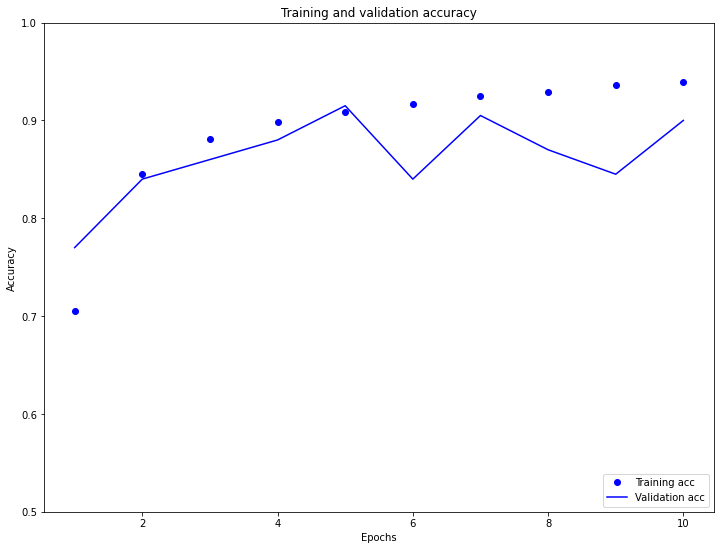

In [16]:
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))
plt.show()

In [18]:
out_vectors = io.open('vecs.tsv', 'w', encoding='utf-8')
out_metadata = io.open('meta.tsv', 'w', encoding='utf-8')

In [19]:
weights = model.layers[0].get_weights()[0]

In [20]:
for num, word in enumerate(encoder.subwords):
    vec = weights[num+1]
    out_metadata.write(word + '\n')
    out_vectors.write('\t'.join([str(x) for x in vec]) + '\n')

In [21]:
out_vectors.close()
out_metadata.close()